In [ ]:
# get the data
import os
import tarfile
import urllib.request


DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL,housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    print('csv_path:',csv_path)
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
print(housing.head())
print(housing.columns)
print(housing.shape)

csv_path: datasets/housing/housing.csv
   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
(20640, 10)


In [ ]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
# run hypothesis theorem
# Null Hypothesis,no relationship between between predictors and target
# Alternate Hypothesis :Significant relationship between predictors and target
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
housing['ocean_proximity']=le.fit_transform(housing['ocean_proximity'])

In [ ]:
print(housing.head())

   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0                3
1    -122.22     37.86  ...            358500.0                3
2    -122.24     37.85  ...            352100.0                3
3    -122.25     37.85  ...            341300.0                3
4    -122.25     37.85  ...            342200.0                3

[5 rows x 10 columns]


In [ ]:
# run hypothesis theorem
cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']
target = [ 'median_house_value']
significant_cols = []

from statsmodels.stats import weightstats as stests

for i in cols:
  p_val = stests.ztest(housing[i],housing['median_house_value'])
  p = p_val[1]
  print('columns -->',i)
  print('p : ',p)
  if p < 0.05:
    status ="Reject Null Hypothesis,Significant predictors"
    print(status)
    significant_cols.append(i)
  else:
    status = "Accept Null Hypothesis,Insignifiacant predictors"
    print(status)
print('significant_cols:',significant_cols)

columns --> longitude
p :  0.0
Reject Null Hypothesis,Significant predictors
columns --> latitude
p :  0.0
Reject Null Hypothesis,Significant predictors
columns --> housing_median_age
p :  0.0
Reject Null Hypothesis,Significant predictors
columns --> total_rooms
p :  0.0
Reject Null Hypothesis,Significant predictors
columns --> total_bedrooms
p :  nan
Accept Null Hypothesis,Insignifiacant predictors
columns --> population
p :  0.0
Reject Null Hypothesis,Significant predictors
columns --> households
p :  0.0
Reject Null Hypothesis,Significant predictors
columns --> median_income
p :  0.0
Reject Null Hypothesis,Significant predictors
columns --> ocean_proximity
p :  0.0
Reject Null Hypothesis,Significant predictors
significant_cols: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'ocean_proximity']


In [ ]:
housing.total_bedrooms.value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [ ]:
housing['total_bedrooms'].head(20)

0      129.0
1     1106.0
2      190.0
3      235.0
4      280.0
5      213.0
6      489.0
7      687.0
8      665.0
9      707.0
10     434.0
11     752.0
12     474.0
13     191.0
14     626.0
15     283.0
16     347.0
17     293.0
18     455.0
19     298.0
Name: total_bedrooms, dtype: float64

In [ ]:
# lets carryout univariate analysis
cols
# print(housing.longitude.unique())


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

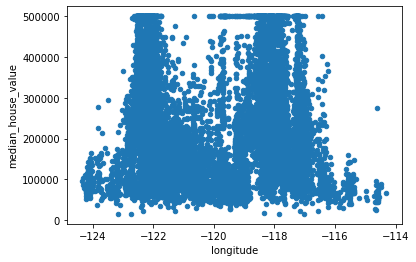

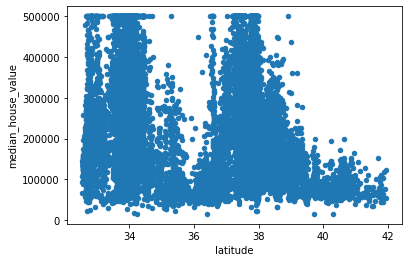

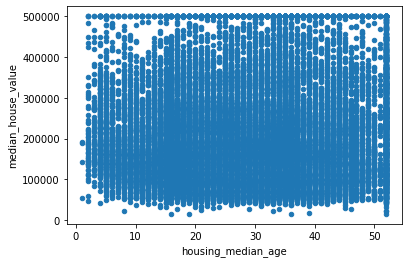

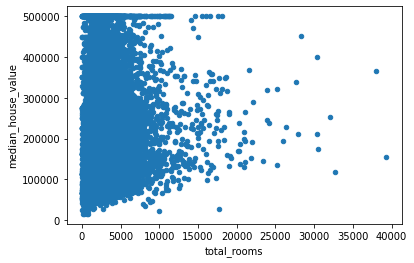

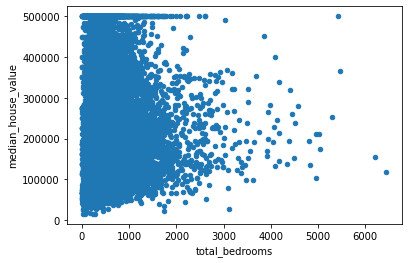

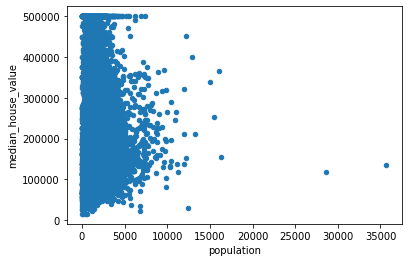

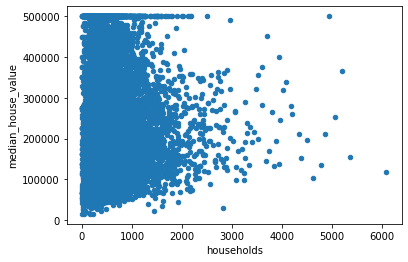

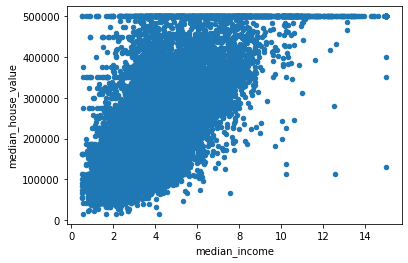

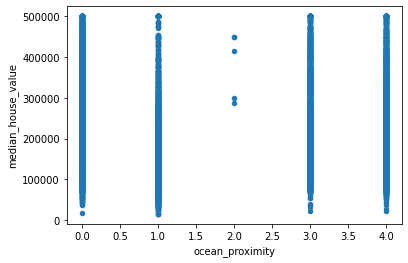

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols

for i in cols:
  housing.plot(kind='scatter',x=i,y='median_house_value')

# for i in cols:
#   plt.scatter(i,housing['median_house_value'])

In [ ]:
# towards building models:
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
print(housing.total_bedrooms.value_counts())
print(housing.total_bedrooms.mode()[0])

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64
280.0


In [ ]:

import numpy as np
housing['total_bedrooms'] = housing.fillna(housing.total_bedrooms.mode()[0])

housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
X=housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity']]

y=housing['median_house_value']

In [ ]:
# towards building models:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)

print(len(X_train))
print(len(X_test))

16512
4128


In [ ]:
# cross validating multiple models: and finre tuning 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from numpy import abs
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

models = []
names = []

models.append(('Linear Regression',LinearRegression()))
models.append(('Decision Tree',DecisionTreeRegressor()))
# models.append(('Random Forest',RandomForestRegressor()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,X_train,y_train,cv = 20,scoring='neg_mean_squared_error')
  cv_score = np.sqrt(np.abs(cv_score))

  # to calculate rmse
  model.fit(X_train,y_train)
  y_pred = model.predict(X_train)

  rmse = np.sqrt(mean_squared_error(y_train,y_pred))
  mae = mean_absolute_error(y_train,y_pred)
  print("---------------------------------")
  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print('rmse:',rmse)
  print('mae:',mae)




---------------------------------
name:--->> Linear Regression
----------------------------------
CV mean Score :69999.26022784715,CV min:65006.753306387494,CV std :2982.0811264808854
rmse: 69893.69357312913
mae: 51258.0136449951
---------------------------------
name:--->> Decision Tree
----------------------------------
CV mean Score :68645.85713513065,CV min:63999.96125569159,CV std :2756.2199467759697
rmse: 0.0
mae: 0.0


In [ ]:
# fine tune the model
# 
random_forest_reg= RandomForestRegressor(n_estimators=100,random_state =42)
random_forest_reg.fit(X_train,y_train)
y_pred_r = random_forest_reg.predict(X_train)
print('rmse:',np.sqrt(mean_squared_error(y_train,y_pred)))

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

rmse: 0.0


In [ ]:
# fine tune the model
forest_scores = model_selection.cross_val_score(random_forest_reg,X_train,y_train,scoring='neg_mean_squared_error',cv =10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [52798.16471032 50798.57374593 50720.59543979 49155.44056372
 53827.64433293 50984.92158532 47488.82067352 49166.61214659
 50876.66839993 45845.27810897]
Mean: 50166.27197070205
Standard deviation: 2237.7504460614928


In [ ]:
# we will go for linear reg
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
# y_pred_lin = lin_reg.predict(X_train)

lin_reg_scores =model_selection.cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores)



Scores: [71757.14277253 67288.37448772 71191.43854409 68513.62937977
 74042.56681872 69768.83752308 68293.44565134 68432.24595933
 74199.46047152 66970.45258379]
Mean: 70045.75941918895
Standard deviation: 2502.5574253727273


In [ ]:
# then we will go for hyperparameter selection
from sklearn.model_selection import GridSearchCV
param_grid =[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
forest_reg = RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
grid_search.best_score_

-2375781601.859292

In [ ]:
# lets look at the best hyper parameter calculated in the process below:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
  print(np.sqrt(-mean_score),params)


60589.500633784286 {'max_features': 2, 'n_estimators': 3}
51780.05740205928 {'max_features': 2, 'n_estimators': 10}
49469.43826189843 {'max_features': 2, 'n_estimators': 30}
56283.079153272156 {'max_features': 4, 'n_estimators': 3}
50458.485552265585 {'max_features': 4, 'n_estimators': 10}
48741.99013026953 {'max_features': 4, 'n_estimators': 30}
58269.94879518978 {'max_features': 6, 'n_estimators': 3}
51632.40636200267 {'max_features': 6, 'n_estimators': 10}
49736.219857369375 {'max_features': 6, 'n_estimators': 30}
59529.511966859296 {'max_features': 8, 'n_estimators': 3}
52993.235206283054 {'max_features': 8, 'n_estimators': 10}
51145.56796793952 {'max_features': 8, 'n_estimators': 30}
58163.15430077361 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
51039.850499750326 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
55944.50354282344 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50480.06758143753 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088833,0.008106,0.005852,0.000660,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.933460e+09,-3.536324e+09,-3.772007e+09,-3.455464e+09,-3.658183e+09,-3.671088e+09,1.696145e+08,18,-1.005304e+09,-9.663378e+08,-9.422549e+08,-9.606402e+08,-9.629595e+08,-9.674993e+08,2.066643e+07
1,0.268854,0.005243,0.013447,0.000298,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.796031e+09,-2.538782e+09,-2.899463e+09,-2.532249e+09,-2.639347e+09,-2.681174e+09,1.449451e+08,10,-5.090191e+08,-5.127345e+08,-4.967572e+08,-5.065672e+08,-5.064904e+08,-5.063137e+08,5.290898e+06
2,0.800386,0.005825,0.035694,0.000281,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.532473e+09,-2.363246e+09,-2.707788e+09,-2.264344e+09,-2.368275e+09,-2.447225e+09,1.561355e+08,2,-3.778244e+08,-3.810890e+08,-3.770904e+08,-3.904978e+08,-3.854813e+08,-3.823966e+08,5.018278e+06
3,0.138379,0.003915,0.005723,0.000508,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.366067e+09,-3.045665e+09,-3.317613e+09,-2.772161e+09,-3.337419e+09,-3.167785e+09,2.288981e+08,13,-8.557528e+08,-8.129396e+08,-8.488674e+08,-8.735392e+08,-8.609716e+08,-8.504141e+08,2.040324e+07
4,0.445908,0.005277,0.013489,0.000176,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.744444e+09,-2.449171e+09,-2.761872e+09,-2.288442e+09,-2.486365e+09,-2.546059e+09,1.817962e+08,4,-4.730321e+08,-4.614948e+08,-4.572447e+08,-4.765601e+08,-4.935044e+08,-4.723672e+08,1.274128e+07
5,1.343856,0.007774,0.036701,0.001003,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.477019e+09,-2.352691e+09,-2.638019e+09,-2.144395e+09,-2.266785e+09,-2.375782e+09,1.702767e+08,1,-3.676501e+08,-3.539712e+08,-3.550024e+08,-3.710923e+08,-3.709579e+08,-3.637348e+08,7.657929e+06
6,0.194430,0.004802,0.005634,0.000279,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.639234e+09,-3.187410e+09,-3.616487e+09,-3.292937e+09,-3.240866e+09,-3.395387e+09,1.928593e+08,16,-8.551809e+08,-8.605236e+08,-8.892021e+08,-8.695886e+08,-8.818485e+08,-8.712688e+08,1.273291e+07
7,0.631098,0.012629,0.013629,0.000395,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.846333e+09,-2.620824e+09,-2.898110e+09,-2.476827e+09,-2.487433e+09,-2.665905e+09,1.766969e+08,9,-4.808764e+08,-4.870181e+08,-4.889538e+08,-4.881432e+08,-4.964615e+08,-4.882906e+08,4.976238e+06
8,1.889844,0.011712,0.036470,0.000946,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.657738e+09,-2.421881e+09,-2.725161e+09,-2.242091e+09,-2.321586e+09,-2.473692e+09,1.879198e+08,3,-3.696703e+08,-3.682553e+08,-3.693942e+08,-3.756335e+08,-3.810932e+08,-3.728093e+08,4.875546e+06
9,0.248374,0.003543,0.005467,0.000067,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.713963e+09,-3.448824e+09,-3.742232e+09,-3.395969e+09,-3.417826e+09,-3.543763e+09,1.517067e+08,17,-8.564588e+08,-8.768015e+08,-8.950509e+08,-9.516168e+08,-8.943795e+08,-8.948615e+08,3.169344e+07


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_estimators':randint(low = 1 , high=200),
                  'max_features':randint(low = 1,high =8)}

forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train,y_train)



RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
cvres=rnd_search.cv_results_

for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
  print(np.sqrt(-mean_score),params)


49329.79739957734 {'max_features': 7, 'n_estimators': 180}
50405.41640102758 {'max_features': 5, 'n_estimators': 15}
48118.343811936866 {'max_features': 3, 'n_estimators': 72}
50029.7261178224 {'max_features': 5, 'n_estimators': 21}
49471.92292662566 {'max_features': 7, 'n_estimators': 122}
48108.58096130456 {'max_features': 3, 'n_estimators': 75}
48036.173692724675 {'max_features': 3, 'n_estimators': 88}
48838.792041086715 {'max_features': 5, 'n_estimators': 100}
47848.649582679885 {'max_features': 3, 'n_estimators': 150}
60878.1671406126 {'max_features': 5, 'n_estimators': 2}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.0937832  0.14395448 0.04359033 0.0343573  0.09049159 0.03635547
 0.03007025 0.43966574 0.08773163]


In [ ]:
sorted(zip(feature_importances, cols), reverse=True)

[(0.4396657410644396, 'median_income'),
 (0.14395447755417065, 'latitude'),
 (0.09378320249941824, 'longitude'),
 (0.09049159459637912, 'total_bedrooms'),
 (0.0877316260060284, 'ocean_proximity'),
 (0.043590332617437354, 'housing_median_age'),
 (0.036355472384263884, 'population'),
 (0.03435730024905066, 'total_rooms'),
 (0.030070253028812128, 'households')]

In [ ]:
final_model = grid_search.best_estimator_
final_prediction = final_model.predict(X_test)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

46616.09508997498


In [ ]:
# we can compute a 95% confidence interval

from scipy import stats 
confidence = 0.95
squared_errors=(final_prediction - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale = stats.sem(squared_errors)))

array([44440.19228753, 48694.86576963])